In [74]:
#importing required libraries
import pandas as pd
import os
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=stopwords.words('english')# downloading stopword list from nltk package

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# display stopword list
stop_words=[i.upper() for i in stop_words]
print(stop_words)

['I', 'ME', 'MY', 'MYSELF', 'WE', 'OUR', 'OURS', 'OURSELVES', 'YOU', "YOU'RE", "YOU'VE", "YOU'LL", "YOU'D", 'YOUR', 'YOURS', 'YOURSELF', 'YOURSELVES', 'HE', 'HIM', 'HIS', 'HIMSELF', 'SHE', "SHE'S", 'HER', 'HERS', 'HERSELF', 'IT', "IT'S", 'ITS', 'ITSELF', 'THEY', 'THEM', 'THEIR', 'THEIRS', 'THEMSELVES', 'WHAT', 'WHICH', 'WHO', 'WHOM', 'THIS', 'THAT', "THAT'LL", 'THESE', 'THOSE', 'AM', 'IS', 'ARE', 'WAS', 'WERE', 'BE', 'BEEN', 'BEING', 'HAVE', 'HAS', 'HAD', 'HAVING', 'DO', 'DOES', 'DID', 'DOING', 'A', 'AN', 'THE', 'AND', 'BUT', 'IF', 'OR', 'BECAUSE', 'AS', 'UNTIL', 'WHILE', 'OF', 'AT', 'BY', 'FOR', 'WITH', 'ABOUT', 'AGAINST', 'BETWEEN', 'INTO', 'THROUGH', 'DURING', 'BEFORE', 'AFTER', 'ABOVE', 'BELOW', 'TO', 'FROM', 'UP', 'DOWN', 'IN', 'OUT', 'ON', 'OFF', 'OVER', 'UNDER', 'AGAIN', 'FURTHER', 'THEN', 'ONCE', 'HERE', 'THERE', 'WHEN', 'WHERE', 'WHY', 'HOW', 'ALL', 'ANY', 'BOTH', 'EACH', 'FEW', 'MORE', 'MOST', 'OTHER', 'SOME', 'SUCH', 'NO', 'NOR', 'NOT', 'ONLY', 'OWN', 'SAME', 'SO', 'THAN', '

In [84]:
from IPython.display import display, Markdown
display(Markdown("[review data source : amazon](https://www.amazon.ca/JBL-Portable-Waterproof-Wireless-Bluetooth/product-reviews/B07CVP5TVZ/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3)"))

[review data source : amazon](https://www.amazon.ca/JBL-Portable-Waterproof-Wireless-Bluetooth/product-reviews/B07CVP5TVZ/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3)

In [76]:
# Import data from text file
f = open("./amazon_jbl_speaker_reviews.txt", "r")
all_words=[] # list of all the words from all the reviews
final_word_list=[] # list of list of individual review's words
for review in f.readlines():
#     print(review)
    remove_special_char_and_separate_all_words = re.findall("[a-zA-Z0-9]+", review.upper())
    remove_stop_words= [word for word in remove_special_char_and_separate_all_words if word.upper() not in stop_words]
    remove_numeric_words=[word for word in remove_stop_words if not word.isnumeric()]
    final_word_list.append(remove_numeric_words)
    for word in final_word_list:
        all_words.append(str(word))
#     print('------------------')
print(final_word_list)# display list of reviews with their words

[['CONNECTION', 'TURNING', 'ISSUES', 'SPEAKER', 'RECENTLY', 'TOTALLY', 'STOPPED', 'WORKING', 'WEEKS', 'AGO'], ['BOUGHT', 'JBL', 'XTREME', 'VIA', 'AMAZON', 'SATISFIED', 'JBL', 'PULSE', 'XTREME', 'USED', 'HOME', 'LIVING', 'ROOM', 'ENVIRONMENT', 'SOUND', 'QUALITY', 'OK', 'GOOD', 'ADVERTISED'], ['CUSTOMER', 'SERVICE', 'TERRIBLE', 'REPLIED', 'EMAILS', 'LAST', 'TWO', 'WEEKS'], ['BOUGHT', 'JBL', 'PRODUCTS', 'YEAR', 'ENDED', 'EITHER', 'WORKING', 'WORKING', 'POOR', 'QUALITY', 'BUY', 'ANOTHER', 'BRAND'], ['DISAPPOINTMENT', 'DISCOVER', 'SHOULDER', 'STRAP', 'COME', 'BOX'], ['SPEAKER', 'COULD', 'SUMMED', 'MANY', 'WORDS', 'USE', 'AMAZING', 'SAY', 'WOW', 'CRANK', 'BEAST', 'WOULD', 'SHOCKED', 'SOUND', 'CLEAR', 'BASE', 'GREAT', 'FAIR', 'BIT', 'CASH', 'BUY', 'WORTH', 'EVERY', 'CENT', 'CASH', 'BUY', 'LIVE', 'HOUSES', 'MAIN', 'STREET', 'THINK', 'CRANK', 'SPEAKER', 'CARS', 'DRIVING', 'WOULD', 'HEAR', 'JBL', 'REALLY', 'PACKED', 'PUNCH', 'ONE'], ['SOUND', 'QUALITY', 'DEVICE', 'PRETTY', 'EXCELLENT', 'BATTERY'

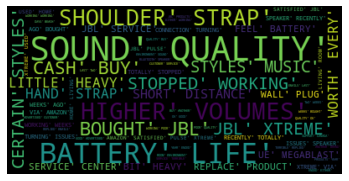

In [77]:
# visulization of frequency of the different words in all the reviews
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
text = ''
print()
text=" ".join((x) for x in all_words)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
# create a list of positive word and negative word list
positive_word_list=['GOOD','BEST','AGREE','BETTER','EXCELLENT','GENUINE','GREAT','HAPPY','WOW','AMAZING','AWESOME','TERRIBLE']
negative_word_list=['DIFFERENT','DISAPPOINTED','DISAPPOINTING','DAMAGED','DISTORTED','FRUSTRATING','ISSUES','PROBLEM','STOPPED',
                   'UNFORTUNATELY','UNRESPONSIVE','BAD','AWKWARD']
pos_count=0 # count for positive reviews
neg_count=0 # count for negative reviews
nue_count=0 # count for nuetral reviews
for review_word in final_word_list:# iterate through all the reviews 
#     print(review_word)
#     positive_count,negative_count=0
    positive_count=[x for x in review_word if x.upper() in positive_word_list]
    negative_count=[x for x in review_word if x.upper() in negative_word_list]
    if len(positive_count)>len(negative_count):
        pos_count+=1
        print("positive review ")  
    elif len(positive_count)<len(negative_count):
        neg_count+=1
        print('negative review') 
    else:
        nue_count+=1
        print('nuetral review')
print()
print("                    *************  Final Result **************               ")
print("total positive review : ",pos_count)
print("total negative review : ",neg_count)
print("total nuetral review : ",nue_count)
print()
print('                    *************  Findings ******************')
print(''' I have first separate all the words from the individual reviews and then i have removed stop words,special char and numerical \n data. Then i have generated word count map and based on that i have developed 2 list : one for negative words and another for positive 
      words. After that i have gone through all the reviews one by one to find out how many positive words are there and how many negative \n words are there? Based on that count i have printed message - positive review : if i found more positive words than negative or negative
      review : if found more negative  words than positive and if both are the same than print nuetral review.''')

negative review
positive review 
positive review 
nuetral review
nuetral review
positive review 
positive review 
positive review 
negative review
positive review 
positive review 
positive review 
positive review 
nuetral review
nuetral review
negative review
nuetral review
negative review
nuetral review
positive review 
positive review 
nuetral review
positive review 
positive review 
positive review 
nuetral review
positive review 
negative review
nuetral review
nuetral review
nuetral review
negative review
negative review
nuetral review
negative review
positive review 
negative review
nuetral review
positive review 
positive review 
positive review 
positive review 
negative review
nuetral review
positive review 
negative review
nuetral review
nuetral review
positive review 
nuetral review
positive review 
positive review 
nuetral review

                    *************  Final Result **************               
total positive review :  24
total negative review :  11
total nuetr